# Sentiment Analysis on IMDb Movie Reviews

## Overview
Train a model by: 
> reviews (x) + positive/negative? (y) ---> model

So that in future the model can: 
> reviews (x) ----> model ----> positive/negative? (y)


## Import library 

In [1]:
# Matrix operation
import numpy as np
# Deep learning library
from keras.datasets import imdb
from keras import layers
from keras import models
from keras.utils.vis_utils import plot_model
from keras.optimizers import RMSprop
# Custom helper functions
from Helper import plot_confusion_matrix
# Library for evaluation
from sklearn.metrics import confusion_matrix
# Plot graphs
import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


## Import data

In [2]:
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=10000)

In [3]:
"""
Our training text (x_train) consists of 25,000 reviews of various length.
Let's look at one of the reviews.
"""
print(x_train[0])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]


In [4]:
"""
It is a sequence of integers, each integer represents a word out of the most-frequent-10,000 words.
For curiosity sake let's have a peek at the original text.
"""
def find_key(input_dict, value):
    return next((k for k, v in input_dict.items() if v == value), None)

review = ''
for integer in x_train[0]:
    review += find_key(imdb.get_word_index(), integer)
    review += ' '

print(review)

the as you with out themselves powerful lets loves their becomes reaching had journalist of lot from anyone to have after out atmosphere never more room and it so heart shows to years of every never going and help moments or of every chest visual movie except her was several of enough more with is now current film as you of mine potentially unfortunately of you than him that with out themselves her get for was camp of you movie sometimes movie that with scary but and to story wonderful that in seeing in character to of 70s musicians with heart had shadows they of here that with her serious to have does when from why what have critics they is you that isn't one will very to as itself with other and in of seen over landed for anyone of and br show's to whether from than out themselves history he name half some br of and odd was two most of mean for 1 any an boat she he should is thought frog but of script you not while history he heart to real at barrel but when from one bit then have tw

In [5]:
"""
Label for this review.
1 for positive and 0 for negative.
"""
print(y_train[3])

1


## Data preprocessing

We will further vectorize our x_train and x_test, which are sequences of integers, into one-hot-vector.
It looks like something below
<img src="./one_hot_encoding.png" width="600px" height="400px">

In [6]:
def one_hot_encode_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = one_hot_encode_sequences(x_train)
x_test = one_hot_encode_sequences(x_test)

y_train = y_train.astype('float32')
y_test = y_test.astype('float32')

In [7]:
print(x_train[0])

[ 0.  1.  1. ...,  0.  0.  0.]


## Train and validate model


Further split
our training set into **"partial train"** and **"validation"** set.

<img src="./train_validation_split.jpg" width="600px" height="400px">

This makes sure that our model will not overfit too bad
**by tuning our model without seeing the test set**.

We can think of **overfitting** as something like
a student who is preparing for an exam memorizes the content of learning material (i.e. our x_train, y_train) too hard that during the exam (i.e. our x_test) he/she can only give correct answers on seen questions but completely fails when new questions arise.

In [8]:
x_val = x_train[:10000]
y_val = y_train[:10000]

partial_x_train = x_train[10000:]
partial_y_train = y_train[10000:]

## Build the model, and train it

our model will look like below
<br>
<img src="./neural_network.jpg" width="600px" height="400px">

Output shape of each layer
- Input layer: 10,000
- Hidden layer 1: 16 
- Hidden layer 2: 16 
- Output layer: 1 (probability of a review being positive)

In [9]:
def build_and_run(epochs=10):
    model = models.Sequential()
    model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
    model.add(layers.Dense(16, activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid'))
    # model.summary()

    model.compile(optimizer=RMSprop(lr=1e-4),
                 loss='binary_crossentropy',
                 metrics=['binary_accuracy'])
    history = model.fit(partial_x_train,
                        partial_y_train,
                        batch_size=16,
                        epochs=epochs,
                        validation_data=(x_val, y_val),
                        verbose=0)
    return model, history

try:
    del model
    del history
except NameError:
    pass
model, history = build_and_run()

## Plotting the result

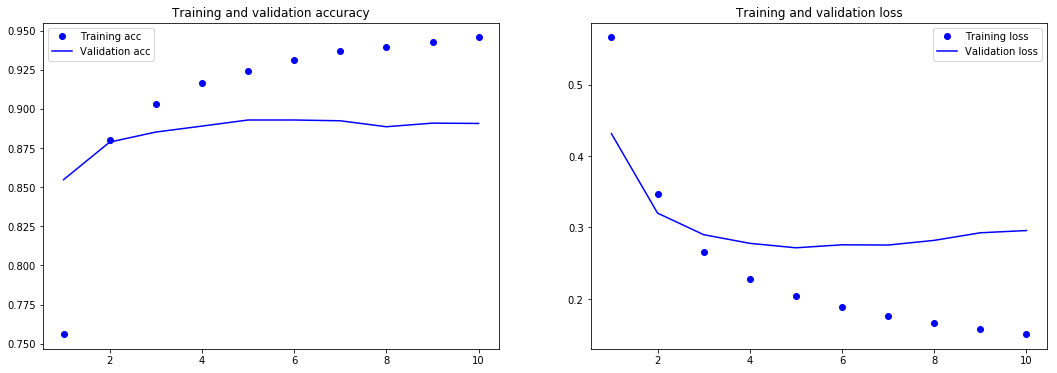

In [10]:
acc = history.history['binary_accuracy']
val_acc = history.history['val_binary_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

f, axarr = plt.subplots(1, 2, figsize=(18, 6))
axarr[0].plot(epochs, acc, 'bo', label='Training acc')
axarr[0].plot(epochs, val_acc, 'b', label='Validation acc')
axarr[0].set_title('Training and validation accuracy')
axarr[0].legend()

axarr[1].plot(epochs, loss, 'bo', label='Training loss')
axarr[1].plot(epochs, val_loss, 'b', label='Validation loss')
axarr[1].set_title('Training and validation loss')
axarr[1].legend()

From the above graph, we can see:
As number of epochs increases, 
1. training accuracy (blue dots) increases, nearly to 100%. That's overfitting
2. validation accuracy (solid line) increases then levels off, at around 88%. That means max. acc has already attained at certain epoch

## Re-train model on optimal epoch <small>seen from the graph above, 5th epoch</small>

In [11]:
from keras import layers
from keras import models

optimal_num_epochs = np.argmax(history.history['val_binary_accuracy']) + 1
print('optimal_num_epochs: %s' % optimal_num_epochs)

try:
    del model
except NameError:
    pass
model, history2 = build_and_run(optimal_num_epochs)

optimal_num_epochs: 5


Our model can attain accuracy of **89%** (on valiation set).
We can tune the model further if we want higher accuracy.

Things can be tuned in includes:
- (depth) number of layers
- (width) size of each layer
- use differnet types of layer (e.g. Word embedding instead of one-hot)
- optimizer: rmsprop, adam, sgd, ...
- batch size
- etc...
They are "hyperparameters"

This is where the art and uncertainty comes in, as at the moment there is no universal rules for optimal settings of the above. We need to tune it case by case.

## Evaluation: Apply model to test set

In [12]:
loss, binary_accuracy = model.evaluate(x_test, y_test, batch_size=512)
print('Accuracy: {} %'.format(str(binary_accuracy * 100)))

24576/25000 [============================>.] - ETA: 0sAccuracy: 88.6440000095 %


Accurracy on test set ~ **88.6%**

Accuracy alone is an acceptable evaluation metrics if our target class ratio is balanced.
<br>In case of imbalanced class (e.g. positive reviews >> negative), other metrics need to be used to have a clearer performance of our model. 

**Confusion matrix** will be a good evaluation matrix

In [13]:
cm = confusion_matrix(y_test, model.predict_classes(x_test).flatten())

24896/25000 [============================>.] - ETA: 0s

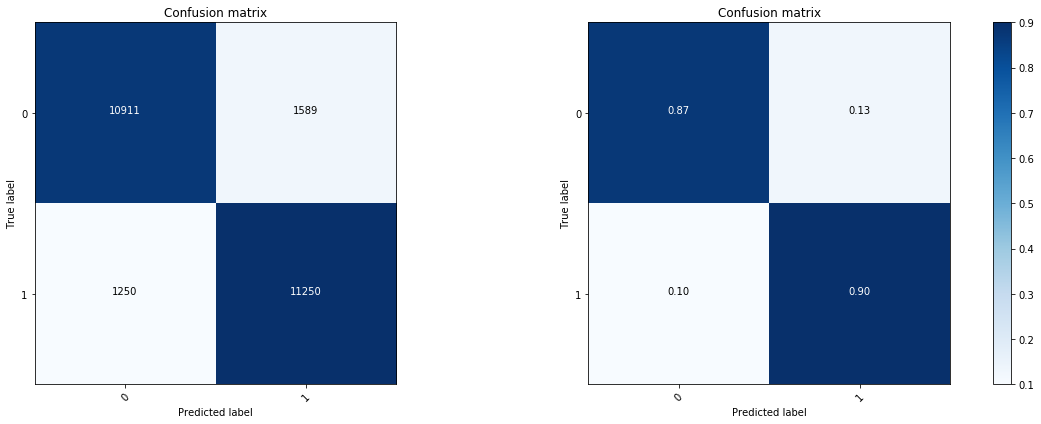

In [14]:
plt.figure(figsize=(20,6))
plt.subplot('121')
plot_confusion_matrix(cm, [0, 1])
plt.subplot('122')
plot_confusion_matrix(cm, [0, 1], normalize=True)

<img src="./confusion_matrix.png">

In this way we can clearly see our class ratio (i.e. how many positive reviews vs negative) in both the true label and predicted label, and more importantly to evaluate our model by precision, recall besides accuracy.

- **Accuracy** = (11201 + 10949) / 25000 = 88.6% 
- **Precision** = (10949) / (10949 + 1299) = 89.4%
- **Recall** = (10949) / (1551 + 10949) = 87.6%